In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('C:\\Users\\satish.TRN\\WorkSpace2\\MachineLearning\\DataSets\\ML\\log_reg_bin.csv')

In [56]:
data.head()

,oxygen,survive
0,10,0
1,5,0
2,75,1
3,14,0
4,8,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
oxygen     15 non-null int64
survive    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


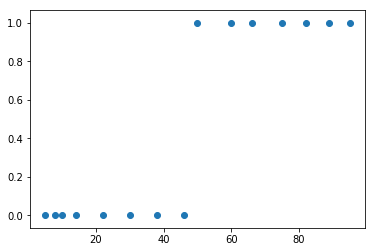

In [58]:
plt.scatter(data.oxygen,data.survive)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [61]:
LR_model.fit(np.array(data[['oxygen']]),np.array(data[['survive']]))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
LR_model.coef_ # Coeficient 'm'


array([[0.04598344]])

In [63]:
LR_model.intercept_ # intercept 'C'

array([-1.64920228])

In [64]:
est = LR_model.predict(data['oxygen'].values.reshape(-1,1))
org = np.array([data['survive']])
est

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [65]:
org[0]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(org[0],est)
cm

array([[6, 2],
       [0, 7]], dtype=int64)

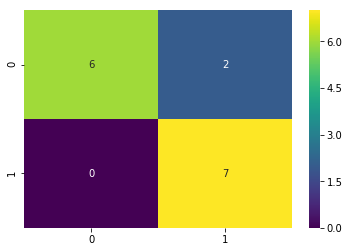

In [67]:
import seaborn as sns
sns.heatmap(cm, cmap='viridis',annot=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data['oxygen'],data['survive'],test_size=0.25,random_state=42)
X_train.shape  , y_train.shape

((11,), (11,))

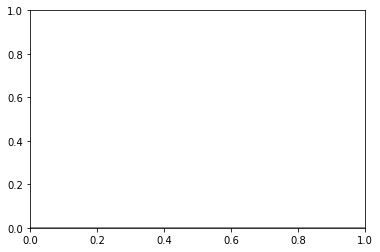

In [69]:
plt.axhline()

In [70]:
data1 = pd.read_csv('C:\\Users\\satish.TRN\\WorkSpace2\\MachineLearning\\DataSets\\ML\\log_reg_mul.csv')

In [71]:
data1.head()

,budget,cars
0,100000,Toyota
1,250000,Toyota
2,500000,Toyota
3,750000,Toyota
4,1000000,Toyota


In [72]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
budget    15 non-null int64
cars      15 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [73]:
data1.cars.unique()

array(['Toyota', 'Ferrari', 'Bugatti'], dtype=object)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data1.budget,data1.cars,test_size=0.30,random_state=210)

In [75]:
train = pd.DataFrame([X_train.reset_index(drop=True),y_train.reset_index(drop=True)]).T.reindex(columns=['budget','cars'])
train.columns

Index(['budget', 'cars'], dtype='object')

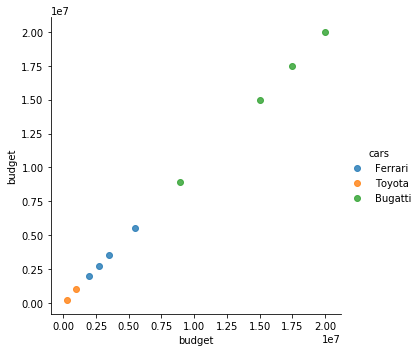

In [76]:
sns.lmplot('budget','budget',data=train,hue='cars',fit_reg=False)

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial",solver="newton-cg")
model.fit(train.budget.values.reshape(-1,1),train.cars.values.reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
model.coef_,model.intercept_

(array([[0.00101478],
        [0.0010133 ],
        [0.00100739]]), array([-9.81347022,  0.66662666,  9.14684356]))

In [79]:
model.score(train.budget.values.reshape(-1,1),train.cars.values.reshape(-1,1))

1.0

In [84]:
est = model.predict(X_test.values.reshape(-1,1))
est

array(['Bugatti', 'Ferrari', 'Toyota', 'Toyota', 'Toyota'], dtype=object)

In [82]:
y_test.values.reshape(-1,1).ravel()

array(['Bugatti', 'Ferrari', 'Toyota', 'Toyota', 'Toyota'], dtype=object)

In [99]:
cm1 = confusion_matrix(y_test.values.reshape(-1,1).ravel(),est)

In [100]:
cm1

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 3]], dtype=int64)

In [101]:
cm2 = confusion_matrix(model.predict(X_train.values.reshape(-1,1)),y_train.values.reshape(-1,1).ravel())
cm2

array([[4, 0, 0],
       [0, 4, 0],
       [0, 0, 2]], dtype=int64)

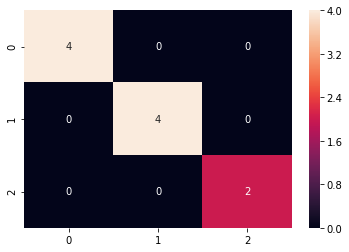

In [104]:
sns.heatmap(cm2,annot=True)

In [ ]:
model.score()